# Intelligent Complaint Analysis for Financial Services

-----------------------------------------------------------------------------------------------

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## EDA

-----------------------------------------------------------------------------------------------

## Import python Libraries

In [ ]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt


### System path

In [ ]:
sys.path.append(os.path.abspath(os.path.join('..')))

### Prepare dataframe

In [ ]:
df = pd.read_csv('../data/complaints.csv', low_memory=False)

#### List of columns

In [ ]:
df.columns.tolist()

['Date received',
 'Product',
 'Sub-product',
 'Issue',
 'Sub-issue',
 'Consumer complaint narrative',
 'Company public response',
 'Company',
 'State',
 'ZIP code',
 'Tags',
 'Consumer consent provided?',
 'Submitted via',
 'Date sent to company',
 'Company response to consumer',
 'Timely response?',
 'Consumer disputed?',
 'Complaint ID']

#### The first five sample data

In [ ]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


#### Data size

In [ ]:
df.shape

(9609797, 18)

#### Stastisics

In [ ]:
df.describe(include='all')

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
count,9609797,9609797,9374502,9609791,8770275,2980756,4839590,9609797,9555281,9579569,628768,7960236,9609797,9609797,9609777,9609797,768299,9.609797e+06
unique,4952,21,86,178,272,2108758,11,7674,63,34965,3,4,7,4901,8,2,2,NaN
top,2025-01-17,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,In accordance with the Fair Credit Reporting a...,Company has responded to the consumer and the ...,"EQUIFAX, INC.",FL,XXXXX,Servicemember,Consent not provided,Web,2025-02-25,Closed with explanation,Yes,No,NaN
freq,34093,4834855,6955847,3613761,2324057,21622,4537468,2321626,1273171,172807,391563,4639279,9017914,32525,5487712,9535859,619921,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.092744e+06
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.774842e+06
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.038016e+06
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.448508e+06
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.129591e+07


In [ ]:
product_counts = df['Product'].value_counts().reset_index()
product_counts.columns = ['Product', 'Count']
product_counts.index = product_counts.index + 1
product_counts

,Product,Count
1,Credit reporting or other personal consumer re...,4834855
2,"Credit reporting, credit repair services, or o...",2163857
3,Debt collection,799197
4,Mortgage,422254
5,Checking or savings account,291178
6,Credit card,226686
7,Credit card or prepaid card,206369
8,"Money transfer, virtual currency, or money ser...",145066
9,Credit reporting,140429
10,Student loan,109717


#### Data types

In [ ]:
df.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

#### Find missing values

In [ ]:
df.isnull().sum()

Date received                         0
Product                               0
Sub-product                      235295
Issue                                 6
Sub-issue                        839522
Consumer complaint narrative    6629041
Company public response         4770207
Company                               0
State                             54516
ZIP code                          30228
Tags                            8981029
Consumer consent provided?      1649561
Submitted via                         0
Date sent to company                  0
Company response to consumer         20
Timely response?                      0
Consumer disputed?              8841498
Complaint ID                          0
dtype: int64

#### Drop all Consumer complaint narrative is null

In [ ]:
# Drop rows where 'Consumer complaint narrative' is null
df_clean = df.dropna(subset=['Consumer complaint narrative'])

# Save the cleaned DataFrame to a new CSV file
df_clean.to_csv('../data/clean_complaints.csv', index=False)
# ...existing code...

#### Data no null consumer complaint narrative

In [ ]:
df_clean = pd.read_csv('../data/clean_complaints.csv', low_memory=False)

#### Data size after consumer complaint narrative is dropped

In [ ]:
df_clean.shape

(2980756, 18)

#### Sample data

In [ ]:
df_clean.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-03-06,Credit reporting or other personal consumer re...,Credit reporting,Problem with fraud alerts or security freezes,NaN,XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX Apt XX...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,75211,NaN,Consent provided,Web,2025-03-06,Closed with explanation,Yes,NaN,12351447
1,2025-02-26,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information is missing that should be on the r...,Subject : Dispute of Unauthorized Hard Inquiri...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,FL,331XX,NaN,Consent provided,Web,2025-02-26,Closed with explanation,Yes,NaN,12203565
2,2025-06-15,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,Changes in loan terms during the application p...,I signed a purchase agreement with Lennar Corp...,Company has responded to the consumer and the ...,"Lennar Financial Services, LLC",IL,60538,NaN,Consent provided,Web,2025-06-15,Closed with explanation,Yes,NaN,14089944
3,2025-06-14,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,"After checking my report, I found numerous acc...",Company has responded to the consumer and the ...,"Fidelity National Information Services, Inc. (...",FL,32303,NaN,Consent provided,Web,2025-06-14,Closed with explanation,Yes,NaN,14080390
4,2025-06-13,Credit card,Store credit card,Getting a credit card,Card opened without my consent or knowledge,A XXXX XXXX card was opened under my name by a...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78230,Servicemember,Consent provided,Web,2025-06-13,Closed with non-monetary relief,Yes,NaN,14069121


In [ ]:
df_clean.isnull().sum()

Date received                         0
Product                               0
Sub-product                       52206
Issue                                 0
Sub-issue                        297406
Consumer complaint narrative          0
Company public response         1379416
Company                               0
State                             10969
ZIP code                              0
Tags                            2671491
Consumer consent provided?            0
Submitted via                         0
Date sent to company                  0
Company response to consumer          9
Timely response?                      0
Consumer disputed?              2816747
Complaint ID                          0
dtype: int64

<Figure size 1500x600 with 0 Axes>

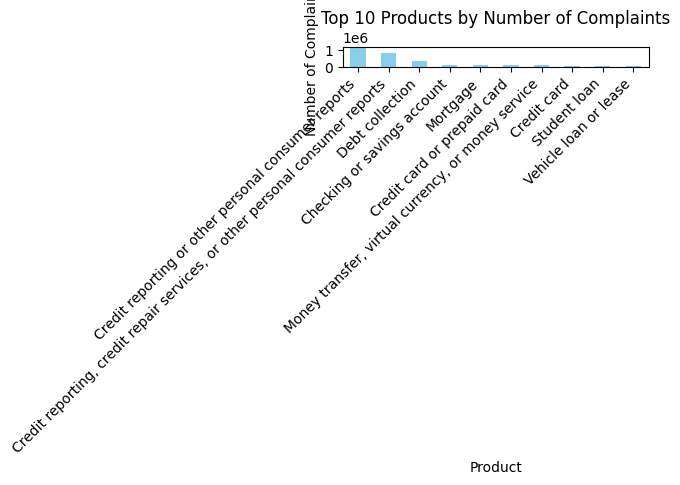

In [ ]:
# Analyze the distribution of complaints across different Products
product_counts = df_clean['Product'].value_counts().reset_index()
product_counts.columns = ['Product', 'Count']
product_counts.index = product_counts.index + 1  # Start numbering from 1

# Display the table
# display(product_counts)

# Plot the top 10 products by complaint count
plt.figure(figsize=(15,6))
product_counts.head(10).plot(
    kind='bar',
    x='Product',
    y='Count',
    legend=False,
    color='skyblue'
)
plt.title('Top 10 Products by Number of Complaints')
plt.ylabel('Number of Complaints')
plt.xlabel('Product')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
# ...existing code...

#### Calculate and visualize the length (word count) of the Consumer complaint narrative. Are there very short or very long narratives

count    2.980756e+06
mean     1.755976e+02
std      2.259282e+02
min      1.000000e+00
25%      5.900000e+01
50%      1.140000e+02
75%      2.090000e+02
max      6.469000e+03
Name: narrative_word_count, dtype: float64


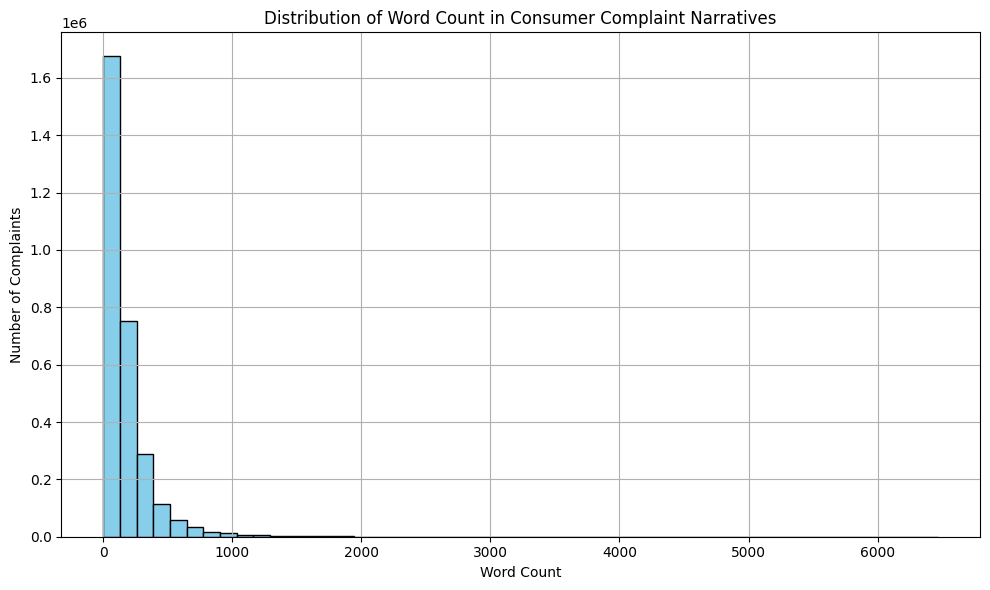

Very short narratives (<=5 words): 4871
Very long narratives (>=500 words): 161598


In [ ]:

# Calculate the word count for each Consumer complaint narrative
df_clean['narrative_word_count'] = df_clean['Consumer complaint narrative'].astype(str).apply(lambda x: len(x.split()))

# Display basic statistics about word counts
print(df_clean['narrative_word_count'].describe())

# Visualize the distribution of word counts
plt.figure(figsize=(10,6))
df_clean['narrative_word_count'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Word Count in Consumer Complaint Narratives')
plt.xlabel('Word Count')
plt.ylabel('Number of Complaints')
plt.tight_layout()
plt.show()

# Check for very short or very long narratives
print("Very short narratives (<=5 words):", (df_clean['narrative_word_count'] <= 5).sum())
print("Very long narratives (>=500 words):", (df_clean['narrative_word_count'] >= 500).sum())
# ...existing code...

#### Identify the number of complaints with and without narratives

In [ ]:
# Number of complaints with a narrative
with_narrative = df['Consumer complaint narrative'].notnull().sum()
print("Number of complaints with narrative:", with_narrative)

# Number of complaints without a narrative
without_narrative = df['Consumer complaint narrative'].isnull().sum()
print("Number of complaints without narrative:", without_narrative)
# ...existing code...

Number of complaints with narrative: 2980756
Number of complaints without narrative: 6629041
